## Simple LLM Workflow

In [2]:
import os
from dotenv import load_dotenv
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

load_dotenv()

True

In [9]:
hugging_face_llm = HuggingFaceEndpoint(
    repo_id="deepseek-ai/DeepSeek-V3.1",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_API_TOKEN"),
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03
)

llm = ChatHuggingFace(llm=hugging_face_llm)

In [ ]:
# result = llm.invoke("what is agent in langgraph")
# print(result.content)

Of course! Let's break down what an **Agent** is in the context of **LangGraph**.

### The Short Answer

In LangGraph, an **Agent** is not a single, monolithic function. Instead, it's a **design pattern** implemented *using* the LangGraph framework. An agent is a **stateful workflow** where a language model (LLM) acts as a reasoning engine, repeatedly deciding which tool to use next to accomplish a complex task.

The core idea is that the LLM becomes a **controller** that directs the flow of execution by choosing from a set of available tools (like calling APIs, searching the web, running code, etc.).

---

### The Detailed Explanation

To understand agents in LangGraph, it's best to compare them to the simpler, more traditional "Agent" concept in frameworks like LangChain.

#### 1. The Traditional "LangChain-Style" Agent

In standard LangChain, an agent is often a single, pre-built chain. You give it a list of tools and a prompt, and it handles the loop internally. The workflow looks 

In [22]:
# Create State
class LLMState(TypedDict):
    question: str
    answer: str
    

In [23]:
def llm_qa(state: LLMState) -> LLMState:
    # Extract the question from state
    question = state['question']

    # Form a prompt 
    prompt = f'Answer the following question {question}'

    # Ask a question from LLM
    answer = llm.invoke(prompt)

    # Update the answer in the state
    state['answer'] = answer.content

    return state

In [24]:
# Create Graph
workflow_graph = StateGraph(LLMState)

# Add Node
workflow_graph.add_node('llm_qa', llm_qa)

# Add Edge
workflow_graph.add_edge(START, 'llm_qa')
workflow_graph.add_edge('llm_qa', END)

# Compile
workflow = workflow_graph.compile()

In [25]:
# Execute the Graph
result = workflow.invoke({'question': "Explain LLMs in short?"})
result['answer']

"Of course. Here is a short explanation of LLMs.\n\n### LLMs in Short\n\n**Large Language Models (LLMs)** are a type of artificial intelligence trained on massive amounts of text data. They are powerful **autocomplete systems** that learn to predict the next most likely word in a sequence.\n\nBecause they've seen so much text (books, articles, code, etc.), they don't just learn grammar; they learn patterns, facts, reasoning skills, and even the styles of different types of writing. This allows them to perform a wide range of tasks, such as:\n\n*   **Generating text** (stories, emails, poems)\n*   **Answering questions**\n*   **Translating languages**\n*   **Summarizing long documents**\n*   **Writing and explaining code**\n\n**Key things to remember:**\n*   They are **statistical**, not conscious. They generate responses based on probability, not true understanding.\n*   Their performance depends heavily on the **quality and quantity of their training data**.\n*   Famous examples inclu

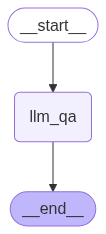

In [26]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

## Prompt Channing

In [3]:
hugging_face_llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_API_TOKEN"),
    task="conversational", 
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03
)

llm = ChatHuggingFace(llm=hugging_face_llm)



In [4]:
# Create State
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    

In [5]:
def create_blog_outline(state: BlogState) -> BlogState:
    # Fetch title
    title = state['title']

    # call llm
    prompt = f"Generate a detailed outline for a blog on the topic - {title}"
    outline = llm.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state


def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'
    content = llm.invoke(prompt).content

    state['content'] = content

    return state



In [6]:
# Create graph
graph = StateGraph(BlogState)

# Add Node
graph.add_node("create_blog_outline", create_blog_outline)
graph.add_node("create_blog", create_blog)

# Add Edge
graph.add_edge(START, 'create_blog_outline')
graph.add_edge('create_blog_outline', 'create_blog')
graph.add_edge('create_blog', END)

# Compile graph
workflow = graph.compile()


In [7]:
intial_state = {'title': 'Rise of AI in Nepal'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in Nepal', 'outline': ' Title: "The Rise of Artificial Intelligence in Nepal: Transforming Industries and Shaping the Future"\n\nI. Introduction\n   A. Brief overview of Artificial Intelligence (AI) and its global impact\n   B. Importance of discussing the AI landscape in Nepal\n   C. Objectives of the blog\n\nII. Background of AI in Nepal\n   A. Historical context of Nepal\'s technological development\n   B. Early introduction to AI and related technologies in Nepal\n   C. Initial initiatives and partnerships (e.g., collaboration with foreign universities and organizations)\n\nIII. Recent Developments and Current State of AI in Nepal\n   A. Government initiatives and policies\n      1. National Information Technology Center (NITC) and its AI Roadmap\n      2. fellowship programs encouraging AI research\n      3. Nepal Telecommunications Authority\'s efforts in AI and digital transformation\n   B. Academia and Research Institutes\n      1. Universities and researc

In [9]:
print(final_state['content'])

 Title: The Rise of Artificial Intelligence in Nepal: Transforming Industries and Shaping the Future

I. Introduction
Artificial Intelligence (AI) has emerged as a game-changer in various sectors worldwide, leading to significant advancements and efficiencies. As the world embraces this technological revolution, it is essential to discuss the AI landscape in Nepal and understand its impact on industries and the future. In this blog, we introduce the concept of AI, discuss its importance in Nepal, and explore its current developments and applications in the country.

A. Brief Overview of Artificial Intelligence (AI) and Its Global Impact
AI refers to machines or software that mimic human intelligence and perform tasks normally requiring human intervention, such as reasoning, problem-solving, learning, and perception. AI has been hailed as the next Industrial Revolution with applications in healthcare, education, finance, transportation, agriculture, and more.

B. Importance of Discussin

In [24]:
from IPython.display import Image
Image(workflow.get_graph().draw_ascii())
# Image(workflow.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0))


FileNotFoundError: No such file or directory: '     +-----------+       
     | __start__ |       
     +-----------+       
            *            
            *            
            *            
+---------------------+  
| create_blog_outline |  
+---------------------+  
            *            
            *            
            *            
    +-------------+      
    | create_blog |      
    +-------------+      
            *            
            *            
            *            
      +---------+        
      | __end__ |        
      +---------+        '

FileNotFoundError: No such file or directory: '     +-----------+       
     | __start__ |       
     +-----------+       
            *            
            *            
            *            
+---------------------+  
| create_blog_outline |  
+---------------------+  
            *            
            *            
            *            
    +-------------+      
    | create_blog |      
    +-------------+      
            *            
            *            
            *            
      +---------+        
      | __end__ |        
      +---------+        '

<IPython.core.display.Image object>